In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("feeding-america.csv",index_col='date')

# Sample exercises from book

In [10]:
print(df['recipe_class'].unique())

['soups' 'meatfishgame' 'fruitvegbeans' 'eggscheesedairy' 'breadsweets'
 'beverages' 'accompaniments' 'medhealth']


In [11]:
print(df['recipe_class'].value_counts())

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64


<AxesSubplot: >

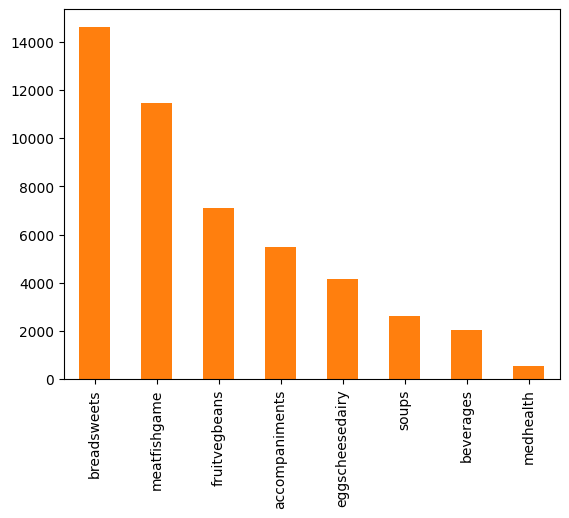

In [12]:
df['recipe_class'].value_counts().plot(kind='bar', color="C1", width=0.5)

       book_id ethnicgroup     recipe_class  region  \
date                                                  
1922  fofb.xml     mexican            soups  ethnic   
1922  fofb.xml     mexican     meatfishgame  ethnic   
1922  fofb.xml     mexican            soups  ethnic   
1922  fofb.xml     mexican    fruitvegbeans  ethnic   
1922  fofb.xml     mexican  eggscheesedairy  ethnic   

                                            ingredients  
date                                                     
1922               chicken;green pepper;rice;salt;water  
1922                                       chicken;rice  
1922                                      allspice;milk  
1922  breadcrumb;cheese;green pepper;pepper;salt;sar...  
1922  butter;egg;green pepper;onion;parsley;pepper;s...  


Text(0.5, 0, 'year of  publication')

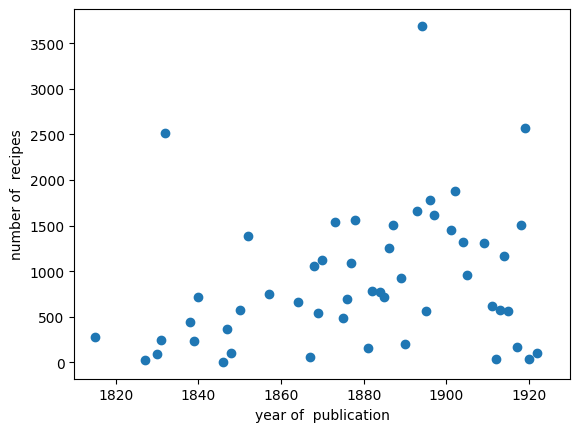

In [13]:
print(df.head()) 

import  matplotlib.pyplot  as  plt 
grouped  =  df.groupby('date') #  group  all  rows  from  the  same  year 
recipe_counts =  grouped.size() #  compute  the  size  of  each  group 
recipe_counts.plot(style='o', xlim=(1810,  1930)) #  plot  the  group  size 
plt.ylabel("number of  recipes") #  add  a  label  to  the  Y-axis 
plt.xlabel("year of  publication") #  add  a  label  to  the  X-axis

<AxesSubplot: xlabel='region'>

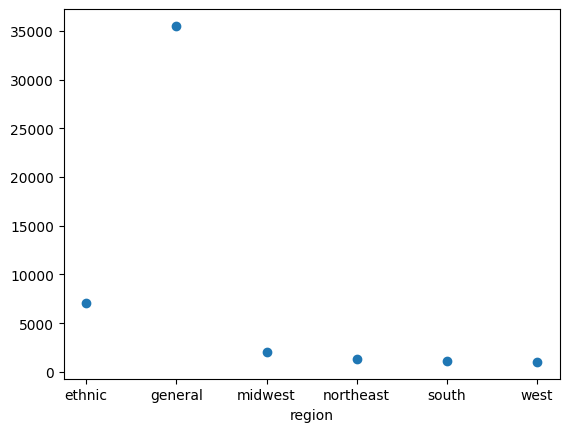

In [14]:
import  matplotlib.pyplot  as  plt 
grouped  =  df.groupby('region') 
region_counts =  grouped.size()
region_counts.plot(style='o')

---

# Exercises for Week 1

## [Easy]

In [15]:
rg = df['region']

In [16]:
print(rg.unique())

['ethnic' 'general' 'northeast' 'midwest' 'west' 'south']


In [17]:
print(f"There are {len(rg.unique())} unique culinary regions in the data set.")

There are 6 unique culinary regions in the data set.


In [18]:
df['region'].value_counts() 

general      35508
ethnic        7040
midwest       2043
northeast     1320
south         1094
west          1027
Name: region, dtype: int64

<AxesSubplot: >

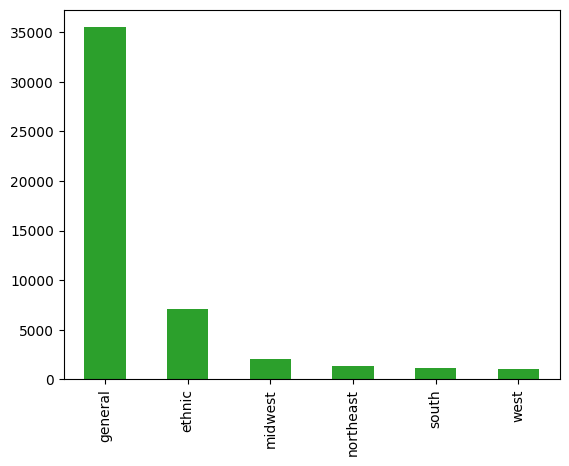

In [19]:
df['region'].value_counts().plot(kind='bar', color="C2", width=0.5)

## [Moderate]

In [20]:
import matplotlib.pyplot as plt

#  split  ingredient  strings  into  lists 
ingredients  =  df['ingredients'].str.split(';') 
#  group  all  rows  from  the  same  year 
groups  =  ingredients.groupby('date') 
#  merge  the  lists  from  the  same  year 
ingredients  =  groups.sum() 
#  compute  counts  per  year 
ingredients  =  ingredients.apply(pd.Series.value_counts) 
#  normalise  the  counts 
ingredients  =  ingredients.divide(recipe_counts, 0)

ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.274489,0.104413,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.396135,0.115942,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.387681,0.018116,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.400000,0.200000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
from  sklearn.feature_selection  import  chi2 
labels  =  [ 
    'Pre-Civil  War'  if  year  <  1864  else  'Post-Civil  War' 
    for  year  in  ingredients.index 
] 
keyness,  _  =  chi2(ingredients.fillna(0),  labels) 

keyness  =  pd.Series( 
keyness,  index=ingredients.columns).sort_values(ascending=False)

print(keyness)

nutmeg                 1.072078e+00
rice water             1.057412e+00
loaf sugar             1.057213e+00
mace                   9.559773e-01
pearlash               7.593178e-01
                           ...     
portugal onion         1.061464e-09
powdered lump sugar    1.061464e-09
pig face               1.061464e-09
biscuit powder         1.061464e-09
fennel seed            3.618088e-11
Length: 3532, dtype: float64


In [23]:
from  sklearn.feature_selection  import  chi2 
#  Transform  the  index  into  a  list  of  labels,  in  which  each  label 
#  indicates  whether  a  row  stems  from  before  or  after  the  Civil  War: 
labels  =  [ 
    'Pre-Civil  War'  if  year  <  1864  else  'Post-Civil  War' 
    for  year  in  ingredients.index 
] 
#  replace  missing  values  with  zero  (.fillna(0)), 
#  and  compute  the  chi2  statistic: 
keyness,  _  =  chi2(ingredients.fillna(0),  labels) 
#  Turn  keyness  values  into  a  Series,  and  sort  in  descending  order: 
keyness  =  pd.Series( 
    keyness,  index=ingredients.columns).sort_values(ascending=False)